In [12]:
#Read data files into R
setwd("/home/jovyan/work/analysis/")

source ("./process_data-excerpt.R")

zTT <- readMultiXLS ("./all_data")
SBJs <- processMultiSBJ ("./all_data")

# Create my sending proportional
zTT[2]$subjects$my_send_proportional <- ifelse(zTT[2]$subjects$Type == 0, zTT[2]$subjects$Contribution/10, ifelse(zTT[2]$subjects$PartnerDecision > 0, zTT[2]$subjects$Contribution/3/zTT[2]$subjects$PartnerDecision, -1))

# add epsilon value to avoid the case 0/0
# EPSILON = 0.001
# zTT[2]$subjects$my_send_proportional <- ifelse(zTT[2]$subjects$Type == 0, zTT[2]$subjects$Contribution/10,  zTT[2]$subjects$Contribution/3/ (zTT[2]$subjects$PartnerDecision + EPSILON))

zTT[2]$subjects$CurrGameProfit <- ifelse(zTT[2]$subjects$Type == 0, zTT[2]$subjects$PartnerDecision - zTT[2]$subjects$Contribution, zTT[2]$subjects$PartnerDecision*3 - zTT[2]$subjects$Contribution)

# set some constants

# Numbers of user of a group
num_users = 6
# Number of rounds each user play to each other
average_rounds = 5
# Number of games for each group 
num_games = 4
# Number of rounds for each game (should be 25)
num_rounds_per_game = (num_users - 1) * average_rounds 
# Number of rounds for each experiment (should be 100, because we have 4 games)
num_rounds_per_exp = num_rounds_per_game * num_games
# Number of experiments (it is 5 at the time of writing, 
# but can be increased if we organize more experiments)
num_exp = nrow (zTT[1]$globals) / num_rounds_per_exp

Type_names = c("SENDER", "RECEIVER")
SIMPLE_GAME_ORDERS =      c(3,2,4,1,2)
ID_GAME_ORDERS =          c(1,4,1,2,3)
SCORE_GAME_ORDERS =       c(2,1,3,4,4)
COMBINE_GAME_ORDERS =     c(4,3,2,3,1)

GAME_NAMES <- c("Simple GAME", "ID GAME", "Score GAME", "Combine GAME")

col_list <- c("red","green","blue","black","orange","violet")

# first, create empty data frames to hold all the particular games
simple_games <- zTT[2]$subjects[0,]
id_games <- zTT[2]$subjects[0,]
score_games <- zTT[2]$subjects[0,]
combine_games <- zTT[2]$subjects[0,]

# create dataframe for each game

for (exp_id in 1:num_exp) {
    first_round_of_exp_globals = (exp_id - 1) * num_rounds_per_exp + 1
    last_round_of_exp_globals = exp_id * num_rounds_per_exp
    globals_of_exp = zTT[1]$globals[first_round_of_exp_globals:last_round_of_exp_globals,]
    
    first_round_of_exp_subjects = (exp_id - 1) * num_rounds_per_exp * num_users + 1
    last_round_of_exp_subjects = exp_id * num_rounds_per_exp * num_users
    subjects_of_exp = zTT[2]$subjects[first_round_of_exp_subjects:last_round_of_exp_subjects,]
    
    SIMPLE_GAME_ORDER = globals_of_exp[1,]$SIMPLE_GAME
    ID_GAME_ORDER = globals_of_exp[1,]$ID_GAME
    SCORE_GAME_ORDER = globals_of_exp[1,]$SCORE_GAME
    COMBINE_GAME_ORDER = globals_of_exp[1,]$COMBINE_GAME
    
    simple_games <- rbind(simple_games, subjects_of_exp[((SIMPLE_GAME_ORDER - 1) * 
        num_rounds_per_game * num_users + 1): 
        (SIMPLE_GAME_ORDER * num_rounds_per_game * num_users),])
    id_games <- rbind(id_games, subjects_of_exp[((ID_GAME_ORDER - 1) * 
        num_rounds_per_game * num_users + 1): 
        (ID_GAME_ORDER * num_rounds_per_game * num_users),])
    score_games <- rbind(score_games, subjects_of_exp[((SCORE_GAME_ORDER - 1) * 
        num_rounds_per_game * num_users + 1): 
        (SCORE_GAME_ORDER * num_rounds_per_game * num_users),])
    combine_games <- rbind(combine_games, subjects_of_exp[((COMBINE_GAME_ORDER - 1) * 
        num_rounds_per_game * num_users + 1): 
        (COMBINE_GAME_ORDER * num_rounds_per_game * num_users),])
}

In [167]:
# plotGameMetrics <- function (game_simple, game_id, game_score, game_combine, metric_name) {
#   means = c(mean(game_simple), mean (game_id), mean (game_score), mean (game_combine))
#   std_errors = c(pop.sd(game_simple)/sqrt(length((game_simple))), 
#                  pop.sd(game_id)/sqrt(length((game_id))),
#                  pop.sd(game_score)/sqrt(length((game_score))),
#                  pop.sd(game_combine)/sqrt(length((game_combine))))
#   show_trusts = c(1,1,2,2)
#   plot (show_trusts, means, main = "", xlim = c(1,2.2), ylim = c(min(means) * 0.9, max(means) * 1.1), ylab = metric_name, xaxt = "n", xlab = "", cex.lab=1.5, cex.axis = 1)
#   axis(1, at=1:2, labels= c("Without Trust","With Trust"), cex.lab=1.5, cex.axis=1.5)
#   epsilon <- 0.02
#   segments(show_trusts,means-std_errors,show_trusts,means+std_errors)
#   segments(show_trusts-epsilon,means-std_errors,show_trusts+epsilon,means-std_errors)
#   segments(show_trusts-epsilon,means+std_errors,show_trusts+epsilon,means+std_errors)
#   segments(show_trusts[1], means[1], show_trusts[3], means[3], col = "red", lwd = 2)
#   segments(show_trusts[2], means[2], show_trusts[4], means[4], col = "blue", lwd = 3, lty = 2)
#   legend(1.5, max(means) * 0.7,
#          c ("With ID", "Without ID"),
#          lty = c(2,1),
#          lwd = c(3,2),
#          col = c("blue","red"),
#          cex=1.5
#   )
# }

In [168]:
# average sending proportion for sender by game  
# plotGameMetrics (simple_games[simple_games$Type == 0 & simple_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    id_games[id_games$Type == 0 & id_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    score_games[score_games$Type == 0 & score_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    combine_games[combine_games$Type == 0 & combine_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    metric_name = "Sending Proportion")


In [169]:
# average sending proportion for receiver by game  
# plotGameMetrics (simple_games[simple_games$Type == 1 & simple_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    id_games[id_games$Type == 1 & id_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    score_games[score_games$Type == 1 & score_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    combine_games[combine_games$Type == 1 & combine_games$my_send_proportional >= 0,]$my_send_proportional, 
#                    metric_name = "Sending Proportion")

In [170]:
library(ggplot2)

In [179]:
#### average sending proportion for sender by game
plotGameMetrics <- function (game_simple, game_id, game_score, game_combine, metric_name) {  
  id_condition=c("without ID", "without ID", "withZ ID", "withZ ID")
  trust_condition=c("without Trust", "withZ Trust", "without Trust", "withZ Trust") 
  avg_send_proportion=c(signif(mean(game_simple),3), 
                        signif(mean(game_score), 3), 
                        signif(mean(game_id), 3),
                        signif(mean(game_combine), 3))
  
  # dirty hack to correctly order (alphabet order) facet_wrap - 'withZ ID' > 'without ID'
  condition_labeller <- as_labeller(c('without ID' = "without ID", 'withZ ID' = "with ID"))
    
  data=data.frame(id_condition, trust_condition, avg_send_proportion)
    
  ggplot(data, aes(fill=trust_condition, y=avg_send_proportion, x=trust_condition)
        ) + ylim(0,.6) + geom_bar(stat="identity") + facet_wrap(~id_condition, labeller=condition_labeller) + xlab("") + scale_x_discrete(labels=c("without Trust" = "without Trust", "withZ Trust" = "with Trust"))+ ylab(metric_name) + theme_bw(base_size = 14) + theme(legend.position="none", axis.title.y = element_text(face="bold")) + scale_fill_grey(start=0.8, end=0.3) + geom_text(aes(label=avg_send_proportion), vjust=1.6, color="white", fontface="bold", size=4)
}

pdf 
  3

png 
  2

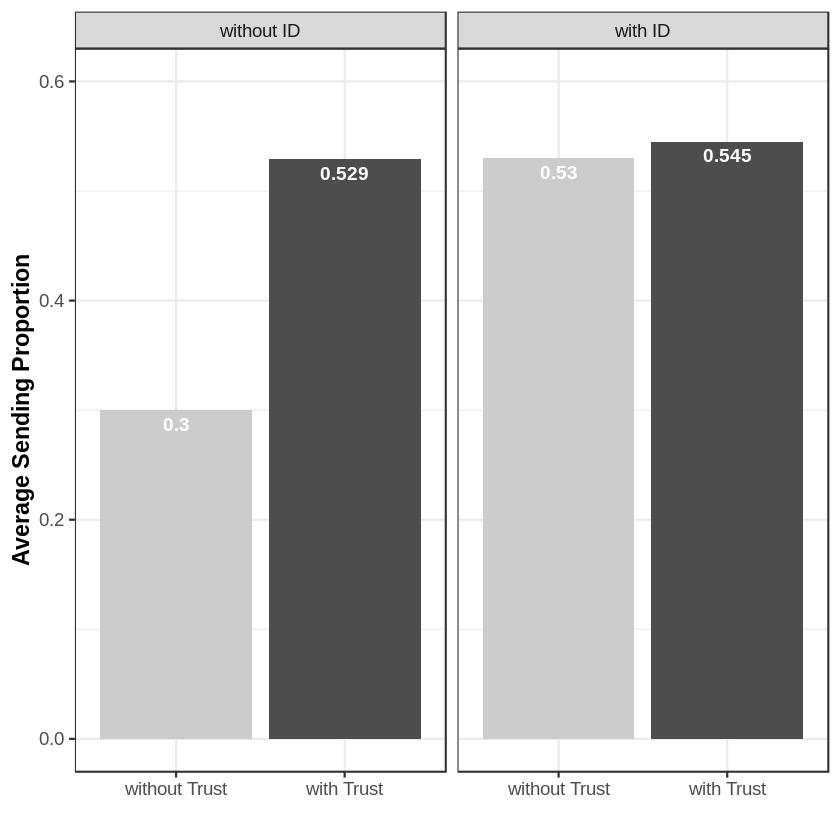

In [180]:
# average sending proportion for sender by game  
plotGameMetrics (simple_games[simple_games$Type == 0 & simple_games$my_send_proportional >= 0,]$my_send_proportional, 
                   id_games[id_games$Type == 0 & id_games$my_send_proportional >= 0,]$my_send_proportional, 
                   score_games[score_games$Type == 0 & score_games$my_send_proportional >= 0,]$my_send_proportional, 
                   combine_games[combine_games$Type == 0 & combine_games$my_send_proportional >= 0,]$my_send_proportional, 
                   metric_name = "Average Sending Proportion")
dev.copy(pdf,"./figures/sending_proportion_sender_by_game.pdf", useDingbats=FALSE)
dev.off()

pdf 
  3

png 
  2

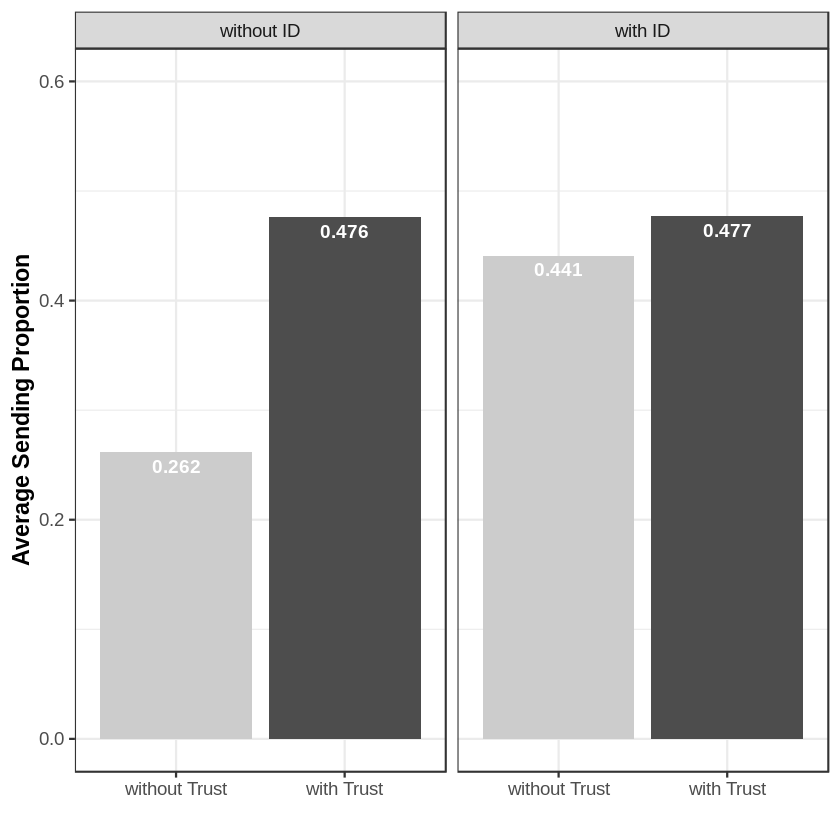

In [174]:
# average sending proportion for receiver by game  
plotGameMetrics (simple_games[simple_games$Type == 1 & simple_games$my_send_proportional >= 0,]$my_send_proportional, 
                   id_games[id_games$Type == 1 & id_games$my_send_proportional >= 0,]$my_send_proportional, 
                   score_games[score_games$Type == 1 & score_games$my_send_proportional >= 0,]$my_send_proportional, 
                   combine_games[combine_games$Type == 1 & combine_games$my_send_proportional >= 0,]$my_send_proportional, 
                   metric_name = "Average Sending Proportion")
dev.copy(pdf,"./figures/sending_proportion_receiver_by_game.pdf", useDingbats=FALSE)
dev.off()